<a href="https://colab.research.google.com/github/kellykhy/DL2022-1/blob/main/UNIFESP_X_ray_Body_Part_Classifier_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
! pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
! pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import pydicom as dcm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import PIL

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kellykimhuiyeong","key":"b1f5b9d19a72e8bb929f0aea546ccc4e"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c unifesp-x-ray-body-part-classifier

100% 29.9G/29.9G [04:38<00:00, 133MB/s]
100% 29.9G/29.9G [04:38<00:00, 115MB/s]


In [4]:
!unzip -qq unifesp-x-ray-body-part-classifier.zip

train images

/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:239: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({bits_stored}-bit) "


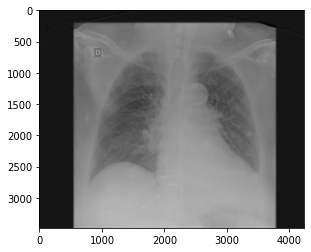

In [24]:
ds = dcm.dcmread('/content/train/train/1/1.2.826.0.1.3680043.8.498.89102450329340531816015855773961083133/1.2.826.0.1.3680043.8.498.11278653404499913987623237519434199794/1.2.826.0.1.3680043.8.498.65452424240994805812717428674475343109-c.dcm')
new_image = ds.pixel_array.astype(float)
scaled_image = (np.maximum(new_image, 0) / new_image.max()) * 255.0
scaled_image = np.uint8(scaled_image)

plt.imshow(scaled_image, cmap=plt.cm.binary)
plt.show()

In [32]:
scaled_image.shape

(3480, 4240)

In [65]:
type(scaled_image)

numpy.ndarray

train images

train.csv (Contains SOPInstanceUID and target information.)

In [ ]:
import csv
 
f = open('train.csv','r')
reader = csv.reader(f)
header = reader.__next__()
data = [row for row in reader]
if header:
    print(header)
    print("======================================================================")
for datarow in data:
    print(datarow)

In [69]:
for datarow in data:
    if datarow[0] == '1.2.826.0.1.3680043.8.498.65452424240994805812717428674475343109':
        print(datarow[1])

3 


In [60]:
len(data)

1738

sample_submission.csv (a sample submission file in the correct format. Contains SOPInstanceUID for the test set.)

In [ ]:
import csv
 
f2 = open('sample_submission.csv','r')
reader = csv.reader(f2)
header = reader.__next__()
data = [row for row in reader]
if header:
    print(header)
    print("======================================================================")
for datarow in data:
    print(datarow)

In [67]:
len(data)

743